In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Check basic info of the table

[Data sources](https://ida2016.blogs.dsv.su.se/?page_id=1387) are provided by Scania, which are also available in [Kaggle Datasets](https://www.kaggle.com/uciml/aps-failure-at-scania-trucks-data-set). All the feature names are anonymized for proprietary reasons. In this section, we will explore and visualize the training data in details so that we can get a better understanding of it.

In [2]:
data = pd.read_csv('../data/ida_2016_training_set_update.csv', na_values=['na'])

In [3]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [4]:
data.shape

(60000, 171)

In [5]:
data.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [7]:
data.dtypes.value_counts() # only 'class' is object

float64    169
object       1
int64        1
dtype: int64

## Null values

Two problems were observed by looking at the data frame:

1. One is missing data - 169 (out of 171) columns have missing values. While there is no missing value for target variable ’class’. In later model comparisons, we need to impute missing data for training some specific algorithms. 

2. The second issue is that the data is unbalanced when we look at the class proportions. In the training data, the percentage between positive and negative cases is 1:59. According to the documentation, this data consists failures of a subset of all available data which were selected by experts. It is reasonable that we have this proportion of failures compared to daily truck APS operations.

In [8]:
# Function to return a table of missing values count&percent
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_values_percent = 100 * df.isnull().sum() / len(df)

    table = pd.concat([missing_values, missing_values_percent], axis=1)
    renamed_table = table.rename(columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})

    # Sort the table by percentage
    renamed_table_sorted = renamed_table[renamed_table.iloc[:,1] != 0].sort_values('Percent of Total Values', ascending=False).round(2)

    print("Input dataframe has " + str(df.shape[1]) + " columns in total.")
    print("There are " + str(renamed_table_sorted.shape[0]) + " columns that have null values.")

    return renamed_table_sorted

In [9]:
missing_values_table(data)

Input dataframe has 171 columns in total.
There are 169 columns that have null values.


,Missing Values,Percent of Total Values
br_000,49264,82.11
bq_000,48722,81.20
bp_000,47740,79.57
bo_000,46333,77.22
ab_000,46329,77.22
...,...,...
by_000,473,0.79
ci_000,338,0.56
cj_000,338,0.56
ck_000,338,0.56


## Visualization

In [10]:
encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])

In [12]:
encoder.transform(['pos', 'neg'])

array([1, 0])

0    59000
1     1000
Name: class, dtype: int64


<AxesSubplot:>

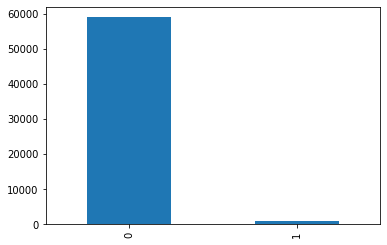

In [13]:
# Target class distribution
print(data['class'].value_counts())
data['class'].value_counts().plot.bar()

Besides, we are also interested in the correlations between all variables. A heat map of correlations is shown as below. It is a bit hard to extract information from this picture because there are so many variables. 

<AxesSubplot:>

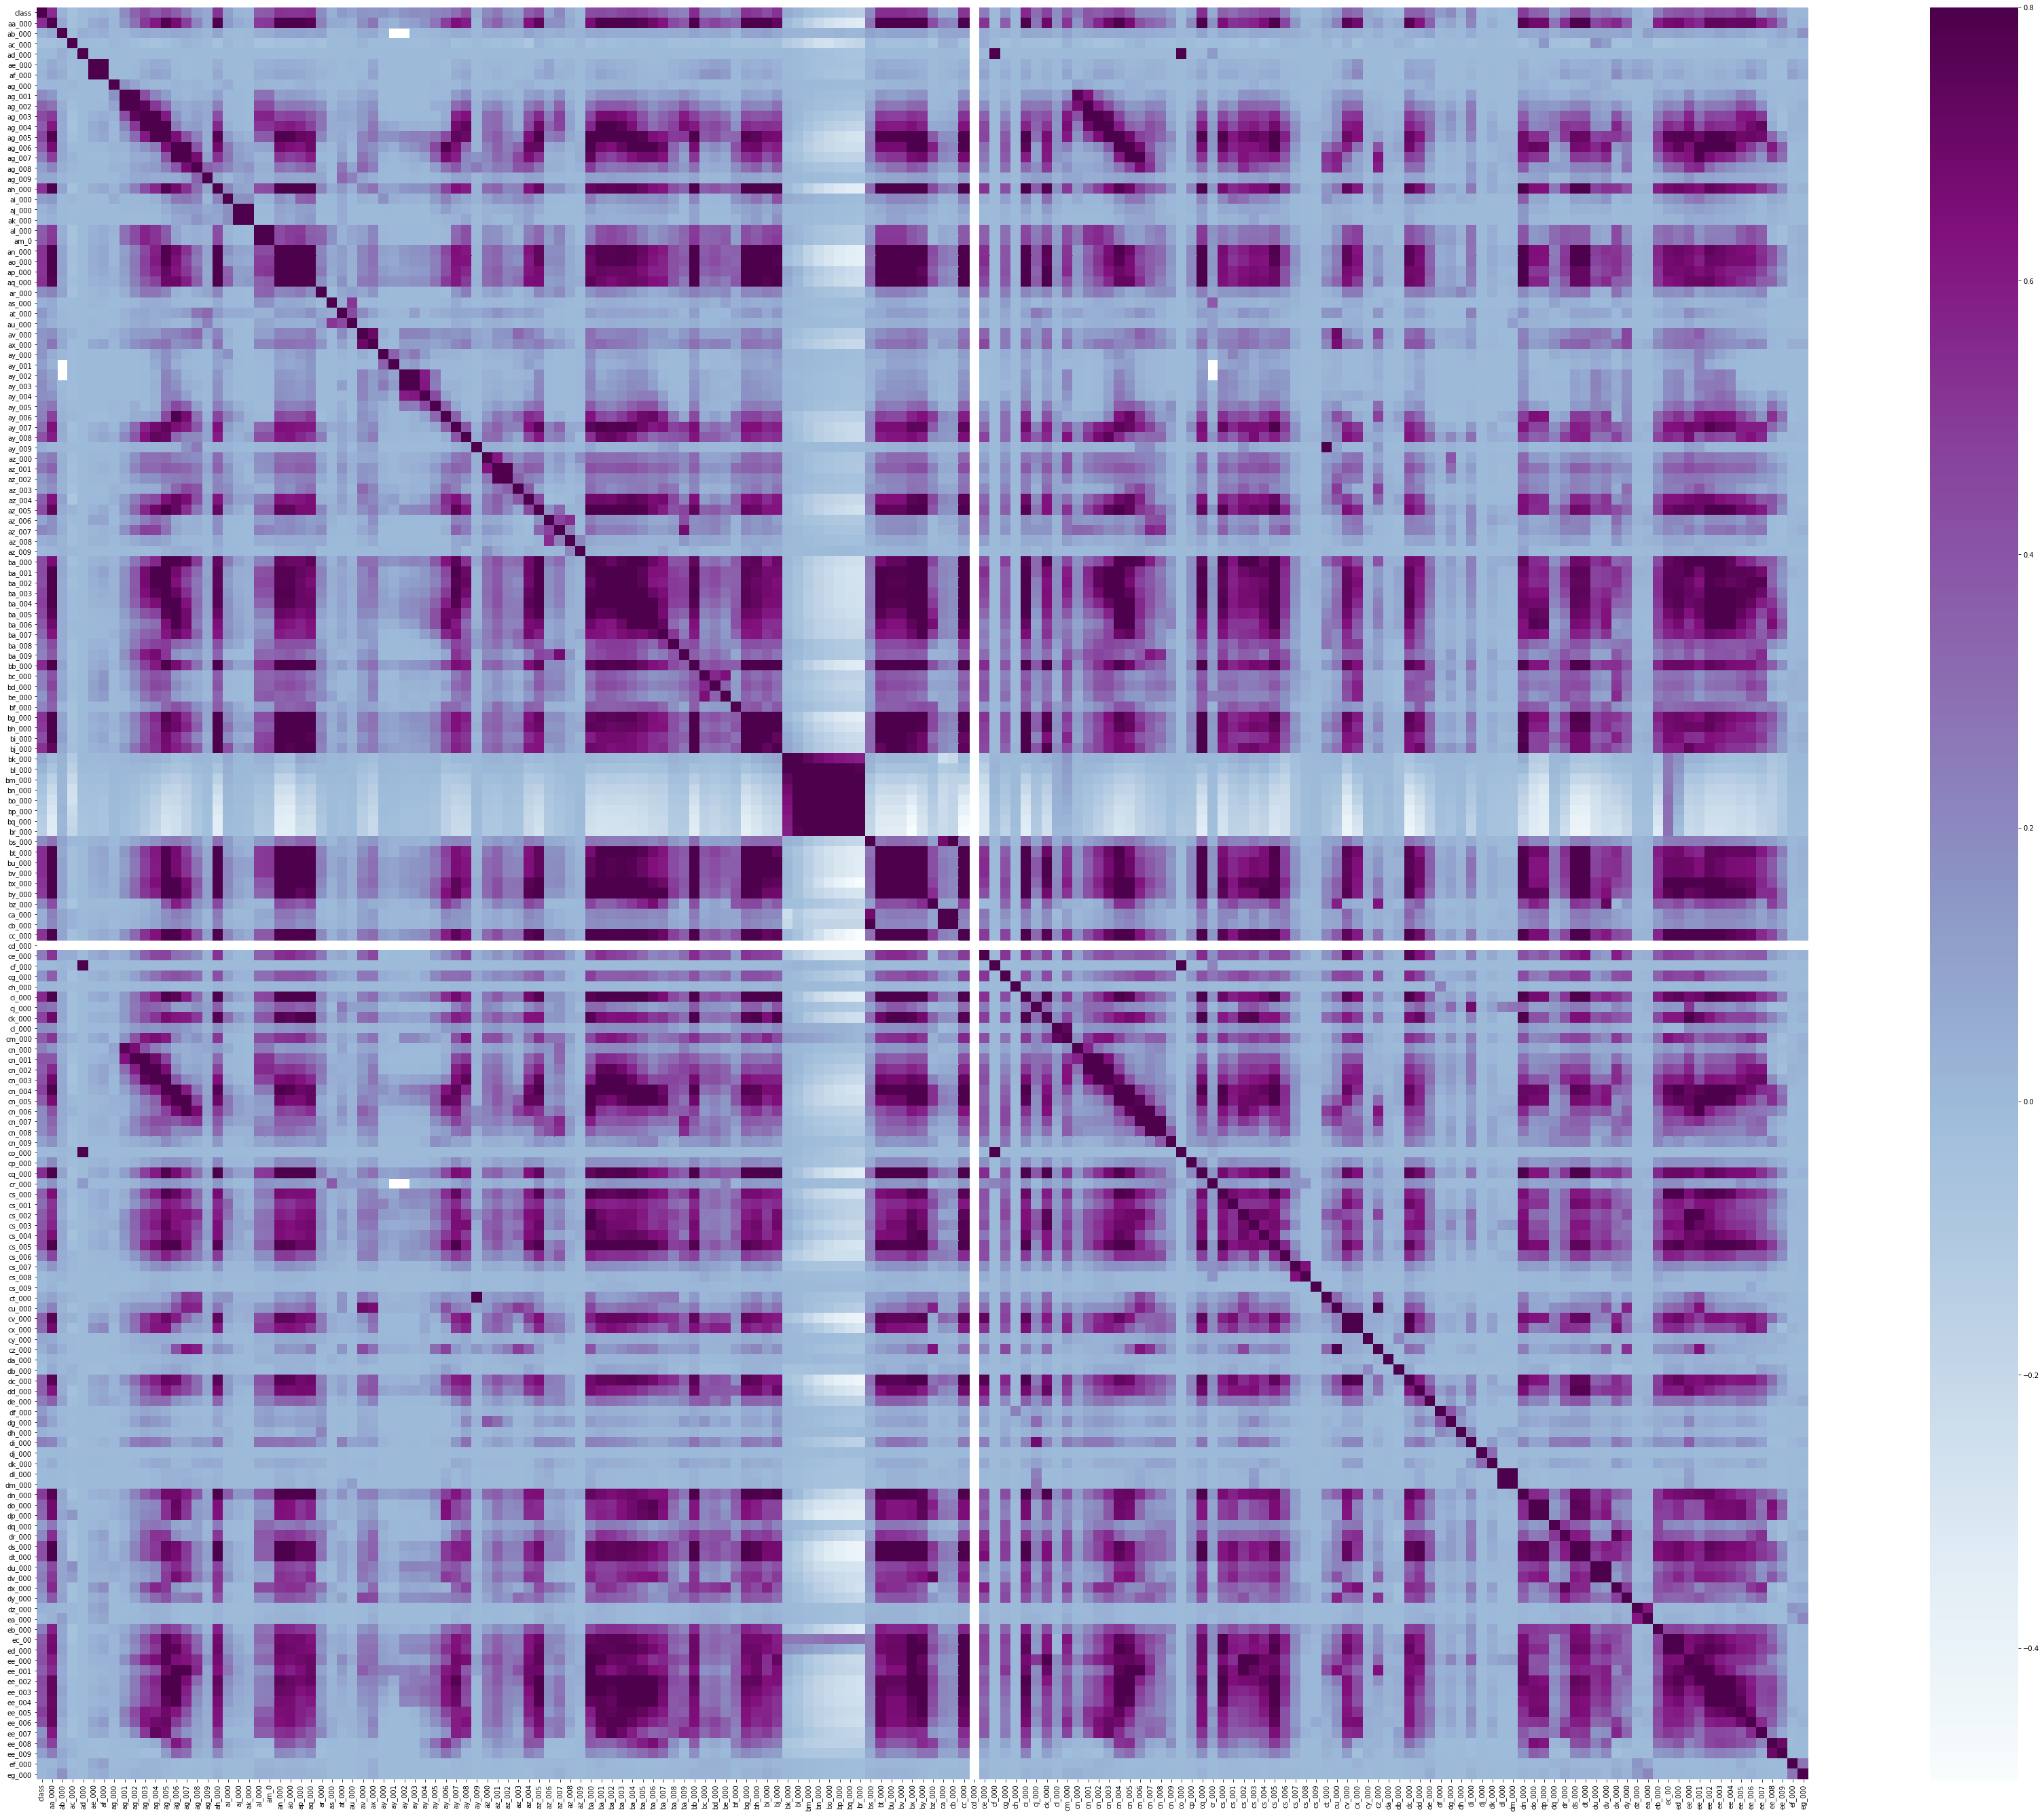

In [14]:
# Correlation between different features and target class
matrix = data.corr() 
f, ax = plt.subplots(figsize=(64, 48)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

By looking closely to the correlation scores of top/bottom 15 features with target variable, one interesting fact is that there are several features have exactly same correlations scores.

In [15]:
class_correlations = matrix['class'].sort_values()

In [17]:
print(f'Most positive correlations:\n {class_correlations.tail(15)}\n')
print(f'Most negative correlations:\n {class_correlations.head(15)}')

Most positive correlations:
 ao_000    0.519890
bg_000    0.522863
an_000    0.524357
ah_000    0.524591
bj_000    0.525249
aq_000    0.531135
aa_000    0.536978
bt_000    0.537452
cq_000    0.541598
bu_000    0.541598
bv_000    0.541598
bb_000    0.542744
ci_000    0.553308
class     1.000000
cd_000         NaN
Name: class, dtype: float64

Most negative correlations:
 br_000   -0.143025
bq_000   -0.131409
bp_000   -0.110656
bo_000   -0.086663
bn_000   -0.057736
ac_000   -0.036533
bm_000   -0.021159
db_000   -0.012566
dl_000   -0.002337
da_000   -0.001800
dj_000   -0.000802
cs_009   -0.000545
cf_000   -0.000416
ad_000   -0.000415
co_000   -0.000411
Name: class, dtype: float64


In [18]:
data['cd_000'].value_counts() # corr=NaN ->'cd_000' column contains the same value

1209600.0    59324
Name: cd_000, dtype: int64

Four most correlated features and four least correlated features were selected to illustrate the relations between distribution of features and the target class, as shown in later figures. From these we can see that there is a clear pattern difference between positive and negative classes; while different features have different range of measures. In contrast, there is not a huge pattern difference for these two classes for four least correlated features.

In [19]:
top_corr_features = list(class_correlations.tail(6).index)[:4] # Remove last two: 'class' and 'cd_000'
bot_corr_features = list(class_correlations.head(4).index)

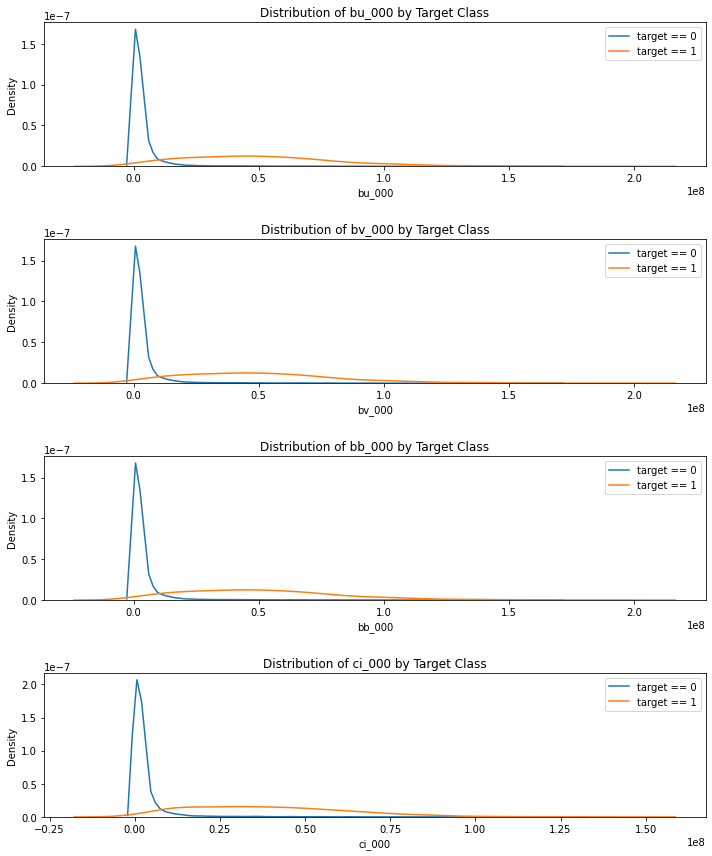

In [20]:
# Plot top 4 correlated features VS class
plt.figure(figsize = (10, 12))
for i, feature in enumerate(top_corr_features):
    
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(data.loc[data['class'] == 0, feature], label = 'target == 0')
    sns.kdeplot(data.loc[data['class'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Class' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

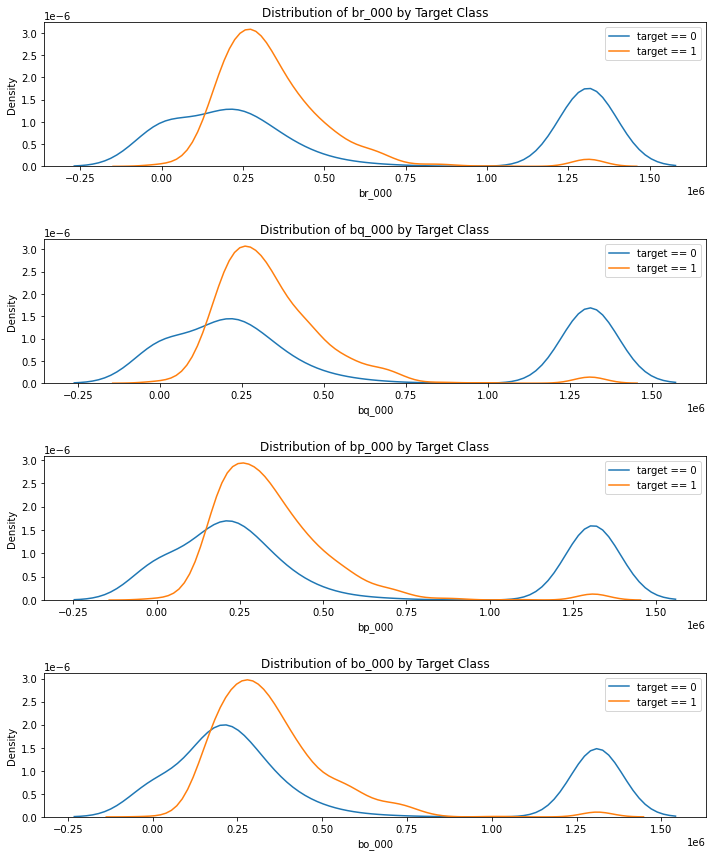

In [21]:
# Plot 4 least correlated features VS target class
plt.figure(figsize = (10, 12))
for i, feature in enumerate(bot_corr_features):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(data.loc[data['class'] == 0, feature], label = 'target == 0')
    sns.kdeplot(data.loc[data['class'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Class' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

<AxesSubplot:>

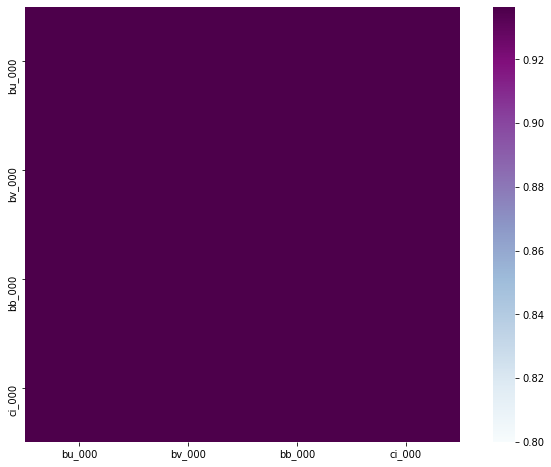

In [22]:
# Plot heat map of correlations within top correlated features
top_corr_matrix = matrix[top_corr_features].loc[top_corr_features]
f, ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(top_corr_matrix, vmax=.8, square=True, cmap="BuPu")

In [23]:
print(top_corr_matrix)

          bu_000    bv_000   bb_000    ci_000
bu_000  1.000000  1.000000  1.00000  0.936459
bv_000  1.000000  1.000000  1.00000  0.936459
bb_000  1.000000  1.000000  1.00000  0.936750
ci_000  0.936459  0.936459  0.93675  1.000000


<AxesSubplot:>

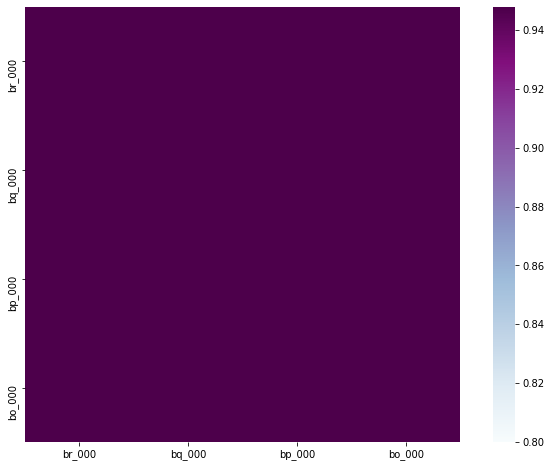

In [24]:
# Plot heat map of correlations within bottom correlated features
bot_corr_matrix = matrix[bot_corr_features].loc[bot_corr_features]
f, ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(bot_corr_matrix, vmax=.8, square=True, cmap="BuPu")

In [25]:
print(bot_corr_matrix)

,br_000,bq_000,bp_000,bo_000
br_000,1.000000,0.985118,0.968480,0.947875
bq_000,0.985118,1.000000,0.982092,0.961137
bp_000,0.968480,0.982092,1.000000,0.977784
bo_000,0.947875,0.961137,0.977784,1.000000


There are some other interesting findings, such as highly correlated features and their heat maps, observed outliers (e.g. ’ac_000’, ’cf_000’, ’co_000’) from the box plot showing mean and standard error.

In [26]:
example_histogram_variables = ['ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009']

<AxesSubplot:>

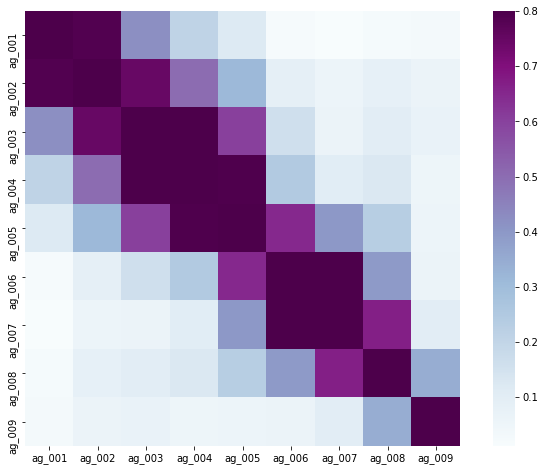

In [27]:
# Plot heat map of correlations within one example histogram variable: 'ag_00n'
hist_corr_matrix = matrix[example_histogram_variables].loc[example_histogram_variables]
f, ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(hist_corr_matrix, vmax=.8, square=True, cmap="BuPu")

In [28]:
print(hist_corr_matrix)

          ag_001    ag_002    ag_003    ag_004    ag_005    ag_006    ag_007  \
ag_001  1.000000  0.788352  0.421545  0.210552  0.122600  0.024089  0.011844   
ag_002  0.788352  1.000000  0.750132  0.502691  0.314566  0.090423  0.060795   
ag_003  0.421545  0.750132  1.000000  0.873726  0.603855  0.161474  0.065796   
ag_004  0.210552  0.502691  0.873726  1.000000  0.795109  0.247928  0.106001   
ag_005  0.122600  0.314566  0.603855  0.795109  1.000000  0.650600  0.401093   
ag_006  0.024089  0.090423  0.161474  0.247928  0.650600  1.000000  0.856696   
ag_007  0.011844  0.060795  0.065796  0.106001  0.401093  0.856696  1.000000   
ag_008  0.024247  0.084280  0.102772  0.127104  0.231439  0.393978  0.668316   
ag_009  0.031160  0.066775  0.071518  0.057304  0.058428  0.064303  0.102257   

          ag_008    ag_009  
ag_001  0.024247  0.031160  
ag_002  0.084280  0.066775  
ag_003  0.102772  0.071518  
ag_004  0.127104  0.057304  
ag_005  0.231439  0.058428  
ag_006  0.393978  0.06430

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

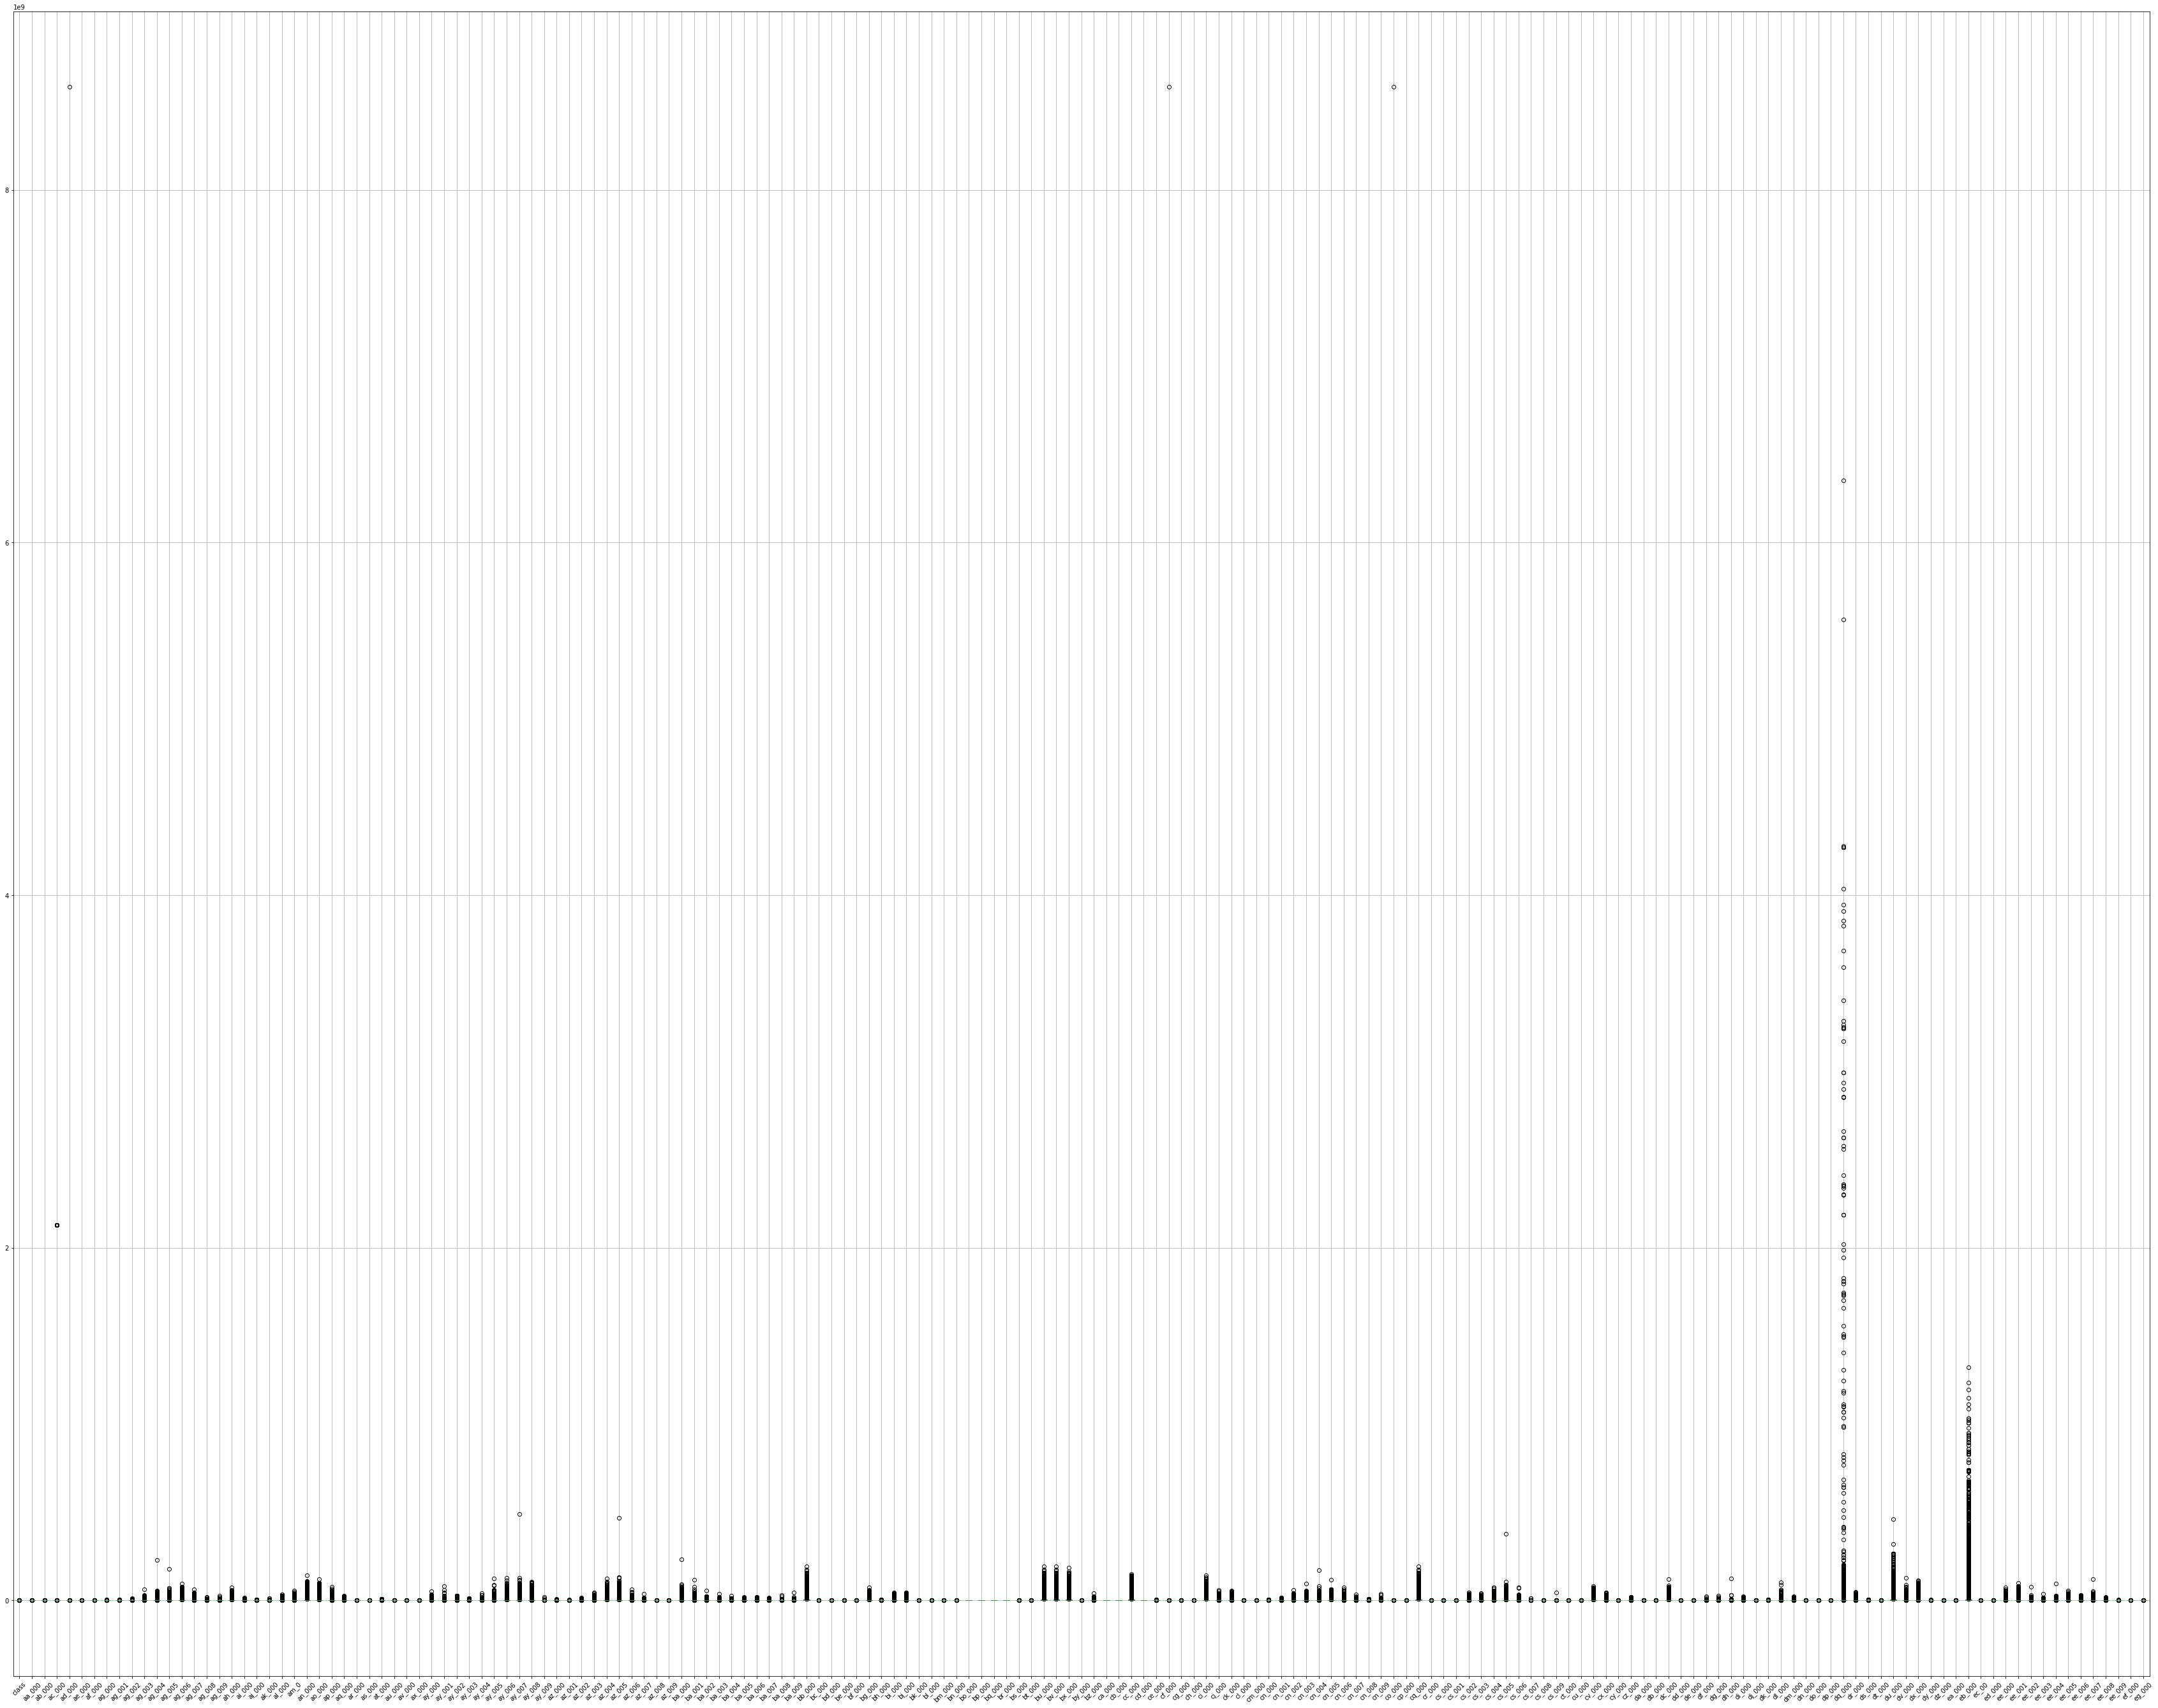

In [32]:
# evaluate the range of values of the features and their average + std
plt.figure(figsize = (60, 48))
data.boxplot()
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)